<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/Transunion_machine_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

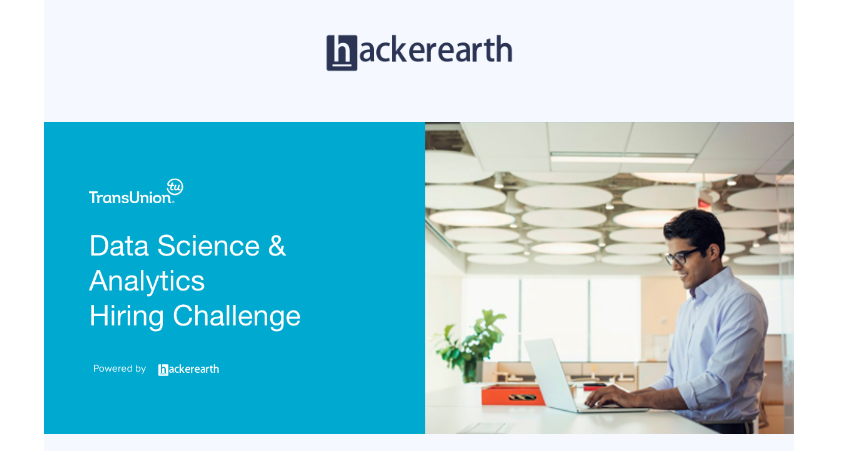

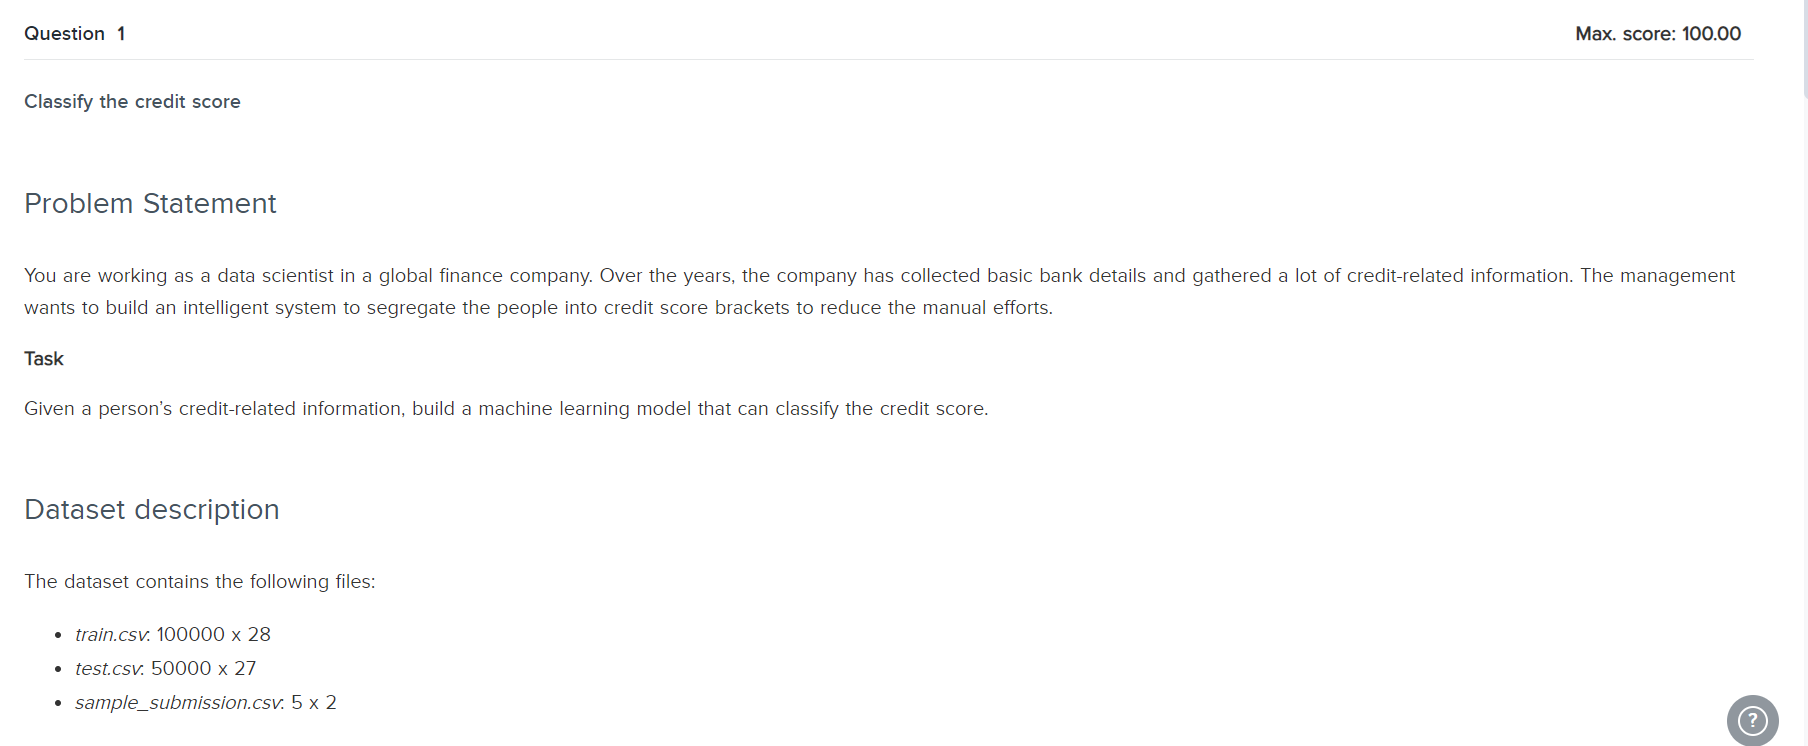

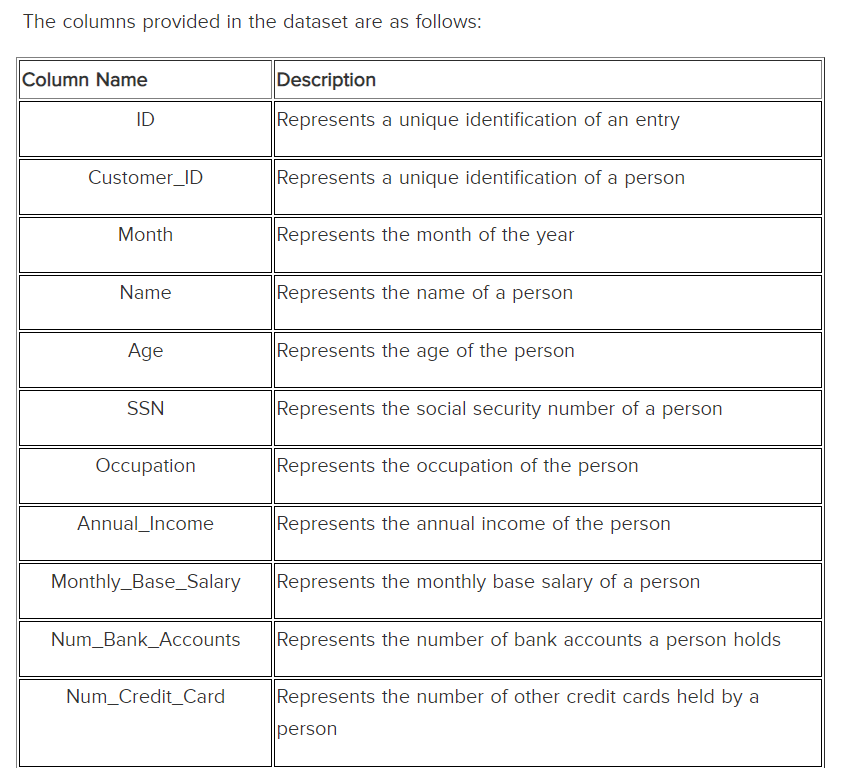

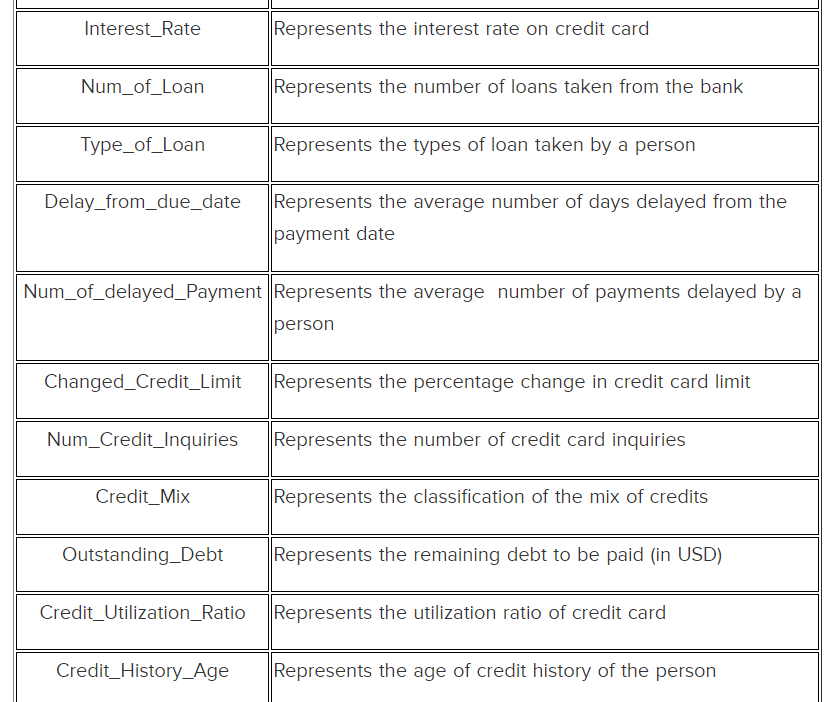

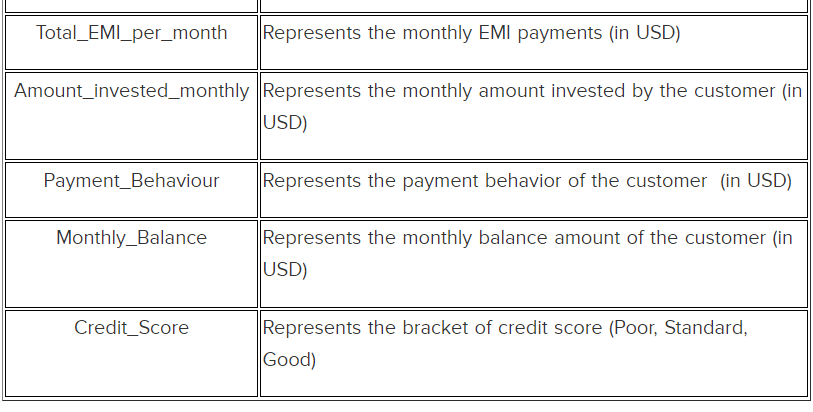

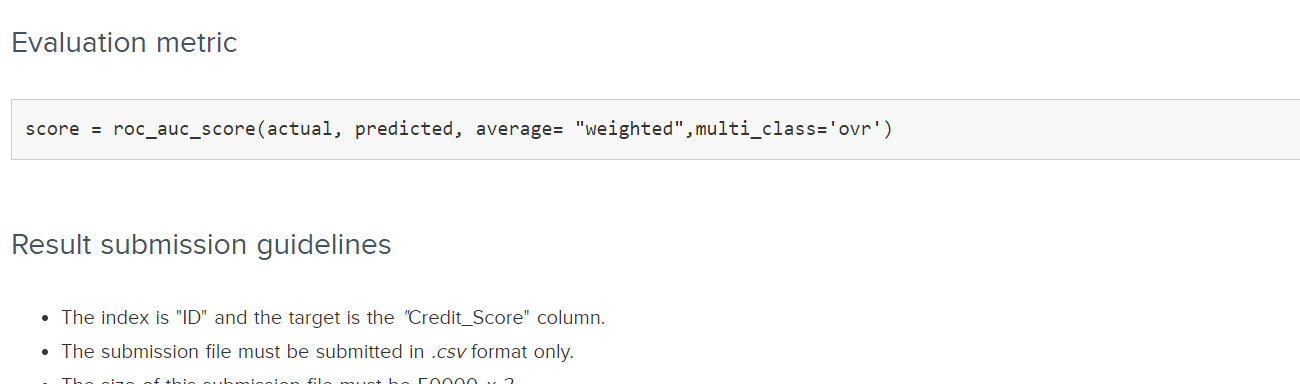

## Mount Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Install Automl Library - PYCARET

In [2]:
!pip install --quiet pycaret[full]

     |████████████████████████████████| 320 kB 4.1 MB/s 
     |████████████████████████████████| 2.0 MB 36.4 MB/s 
     |████████████████████████████████| 1.3 MB 35.8 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 10.4 MB 36.5 MB/s 
     |████████████████████████████████| 6.8 MB 17.1 MB/s 
     |████████████████████████████████| 262 kB 23.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 120 kB 52.0 MB/s 
     |████████████████████████████████| 17.8 MB 1.3 MB/s 
     |████████████████████████████████| 167 kB 51.2 MB/s 
     |████████████████████████████████| 1.7 MB 19.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 177 kB 46.1 MB/s 
     |████████████████████████████████| 11.9 MB 24.5 MB/s 
     |████████████████

In [1]:
! pip install --quiet markupsafe==2.0.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
import jinja2
from pycaret.classification import *
# 
import warnings
warnings.filterwarnings('ignore')
#
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Import Data

In [44]:
train = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/train.csv")
test = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/sample_submission.csv")

## Visualize data imported

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Summary Statistics

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

## Check the missing values

In [ ]:
train.isnull().sum()[train.isnull().sum() > 0]/len(train)

Name                       0.09985
Monthly_Inhand_Salary      0.15002
Type_of_Loan               0.11408
Num_of_Delayed_Payment     0.07002
Num_Credit_Inquiries       0.01965
Credit_History_Age         0.09030
Amount_invested_monthly    0.04479
Monthly_Balance            0.01200
dtype: float64

In [ ]:
test.isnull().sum()[test.isnull().sum() > 0]/len(test)

Name                       0.10030
Monthly_Inhand_Salary      0.14996
Type_of_Loan               0.11408
Num_of_Delayed_Payment     0.06996
Num_Credit_Inquiries       0.02070
Credit_History_Age         0.08940
Amount_invested_monthly    0.04542
Monthly_Balance            0.01124
dtype: float64

In [ ]:
non_repeat_cols_train = [col for col in train.columns if train[col].nunique() == len(train)]

In [ ]:
non_repeat_cols_test = [col for col in test.columns if test[col].nunique() == len(test)]

In [ ]:
non_repeat_cols_train,non_repeat_cols_test

(['ID', 'Credit_Utilization_Ratio'], ['ID', 'Credit_Utilization_Ratio'])

In [ ]:
cat_cols = [col for col in train.columns if train[col].dtypes == 'object' and col != 'ID']

In [ ]:
cat_cols

['Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [ ]:
train[cat_cols].head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Preprocessing

In [ ]:
drop_cols  = ['ID']
train_new = train.drop(drop_cols,axis=1)
test_new = test.drop(drop_cols,axis=1)

In [ ]:
test_new['Credit_Score'] = 'NA'

## Combining both train and test data to preprocess the data


In [ ]:
data = pd.concat([train_new,test_new],axis=0)

In [ ]:
train_new.shape,test_new.shape,data.shape

((100000, 27), (50000, 27), (150000, 27))

## Get the list of unique customer id

In [ ]:
unique_cust_list = data['Customer_ID'].unique().tolist()

In [ ]:
len(unique_cust_list)

12500

## Prepare a dictionary to fill in most commonly occuring values for attributes specific to Customer ID

In [ ]:
print(data[data['Customer_ID'] == unique_cust_list [0]]['Age'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['SSN'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Monthly_Inhand_Salary'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Credit_History_Age'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Credit_Mix'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Num_Credit_Card'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Occupation'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Num_of_Loan'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Num_Credit_Inquiries'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Credit_History_Age'].mode()[0])


23
821-00-0265
1824.8433333333328
22 Years and 1 Months
Good
4
Scientist
4
4.0
22 Years and 1 Months


In [ ]:
occ_dict = {}
for cust_id in unique_cust_list :
  occ_dict[cust_id] = data[data['Customer_ID'] == cust_id]['Occupation'].mode()[0]

In [ ]:
num_loan  = {}
for cust_id in unique_cust_list :
  num_loan[cust_id] = data[data['Customer_ID'] == cust_id]['Num_of_Loan'].mode()[0]

In [ ]:
age_dict = {}
for cust_id in unique_cust_list :
  age_dict[cust_id] = data[data['Customer_ID'] == cust_id]['Age'].mode()[0]

In [ ]:
monthly_sal = {}
for cust_id in unique_cust_list :
  monthly_sal[cust_id] = data[data['Customer_ID'] == cust_id]['Monthly_Inhand_Salary'].mode()[0]

In [ ]:
cr_hist_age = {}
for cust_id in unique_cust_list :
  cr_hist_age[cust_id] = data[data['Customer_ID'] == cust_id]['Credit_History_Age'].mode()[0]

In [ ]:
num_cc_card = {}
for cust_id in unique_cust_list :
  num_cc_card[cust_id] = data[data['Customer_ID'] == cust_id]['Num_Credit_Card'].mode()[0]

In [ ]:
data['Occupation'] = data['Customer_ID'].map(occ_dict)
data['Num_of_Loan'] = data['Customer_ID'].map(num_loan)
data['Age'] = data['Customer_ID'].map(age_dict)
data['Monthly_Inhand_Salary'] = data['Customer_ID'].map(monthly_sal)
data['Num_Credit_Card'] = data['Customer_ID'].map(num_cc_card)
data['Credit_History_Age'] = data['Customer_ID'].map(num_cc_card)

In [ ]:
data.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Function to remove underscore

In [2]:
def repl_(x):
  return x.replace("_","")

## Converting desired features to number and float accordingly

In [ ]:
data['Annual_Income'] = data['Annual_Income'].map(repl_).astype(float)

In [ ]:
data['Num_of_Loan'] = data['Num_of_Loan'].map(repl_).astype(int)

In [ ]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna('0').astype('str').map(repl_).astype(int)

In [ ]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna('0').map(repl_).astype(float)

In [ ]:
data['Monthly_Balance'] = data['Monthly_Balance'].fillna('0').astype('str').map(repl_).astype(float)

In [ ]:
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].astype('str').map(repl_).astype(float)

In [ ]:
data['Changed_Credit_Limit'] =data['Changed_Credit_Limit'].map(repl_)

In [ ]:
cols_not_to_use  = ['Name','SSN','Type_of_Loan']
data = data.drop(cols_not_to_use,axis=1)

## Check for missing values any in the preprocessed data

In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  object 
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  float64
 5   Monthly_Inhand_Salary     150000 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  int64  
 7   Num_Credit_Card           150000 non-null  int64  
 8   Interest_Rate             150000 non-null  int64  
 9   Num_of_Loan               150000 non-null  int64  
 10  Delay_from_due_date       150000 non-null  int64  
 11  Num_of_Delayed_Payment    150000 non-null  int64  
 12  Changed_Credit_Limit      150000 non-null  object 
 13  Num_Credit_Inquiries      147000 non-null  fl

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]

Num_Credit_Inquiries    3000
dtype: int64

## Fill nan values with 0

In [ ]:
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(0)

In [ ]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,0,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Convert Changed_Credit_Limit to float

In [ ]:
data['Changed_Credit_Limit'] =data['Changed_Credit_Limit'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [ ]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,0,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,NaN,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]

Changed_Credit_Limit    3150
dtype: int64

## Filling Nan values ussing backfil method

In [ ]:
data['Changed_Credit_Limit'] =data['Changed_Credit_Limit'].fillna(method='bfill')

In [ ]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,0,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,6.27,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Check if still any null values are present

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

## Sepearte Training and Testing Data Samples

In [ ]:
train_processed = data[data['Credit_Score'] != 'NA']

In [ ]:
train_processed.shape

(100000, 24)

In [ ]:
test_processed = data[data['Credit_Score'] == 'NA']
test_processed.shape

(50000, 24)

In [ ]:
test_processed = test_processed.drop('Credit_Score',axis=1)

In [ ]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  int64  
 12  Changed_Credit_Limit      100000 non-null  float32
 13  Num_Credit_Inquiries      100000 non-null  fl

## Data Visualization

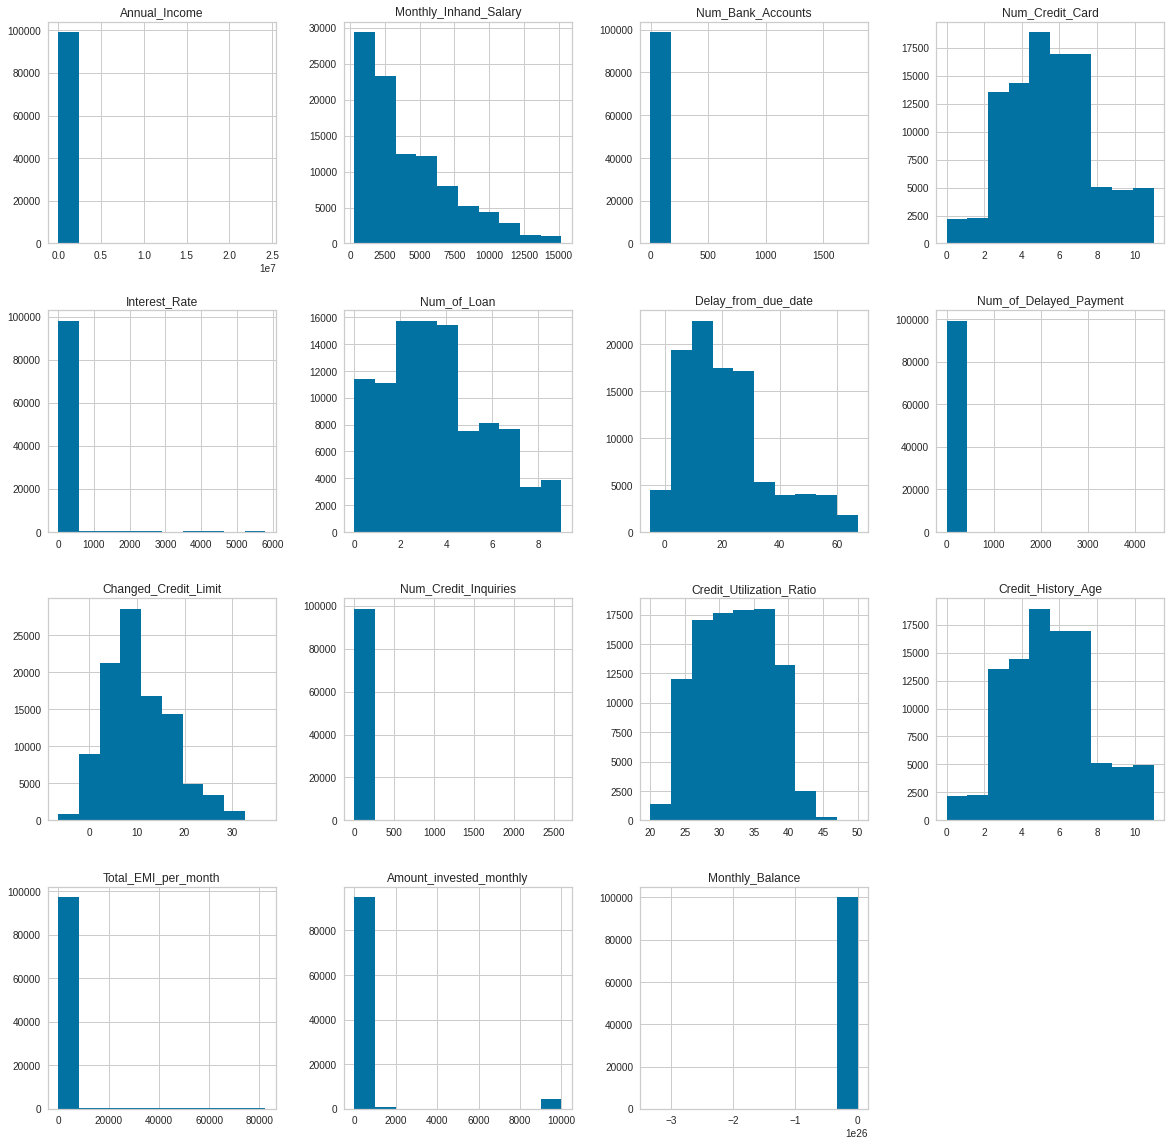

In [ ]:
%matplotlib inline
train_processed.hist(figsize = (20,20))
plt.show()

## Visualize Target

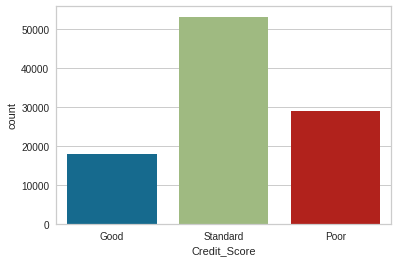

In [ ]:
sns.countplot(x='Credit_Score',data=train_processed)
plt.show()

* The data seems imbalanced

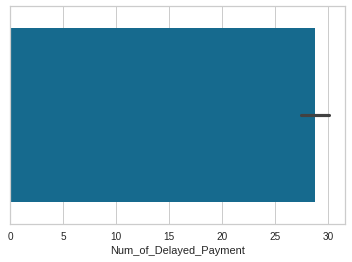

In [ ]:
sns.barplot(x='Num_of_Delayed_Payment',data=train_processed)
plt.show()

In [ ]:
train_processed.to_csv("/content/drive/MyDrive/HackerEarth/TransUnion/train_processed.csv",index=False)
test_processed.to_csv("/content/drive/MyDrive/HackerEarth/TransUnion/test_processed.csv",index=False)

In [3]:
train_processed = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/train_processed.csv")
test_processed = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/test_processed.csv")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [5]:
train_processed['Outstanding_Debt'].dtypes

dtype('O')

In [6]:
train_processed['Outstanding_Debt'] = train_processed['Outstanding_Debt'].astype('str').map(repl_)

In [7]:
train_processed['Outstanding_Debt'] = train_processed['Outstanding_Debt'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [8]:
test_processed['Outstanding_Debt'] = test_processed['Outstanding_Debt'].astype('str').map(repl_)

In [9]:
test_processed['Outstanding_Debt'] = test_processed['Outstanding_Debt'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [10]:
cat_cols = [col for col in train_processed.columns if train_processed[col].dtypes == 'object']
print(cat_cols)
cate_cols  = ['Customer_ID',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

['Customer_ID', 'Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [11]:
lb = LabelEncoder()
for col in cate_cols :
  train_processed[col] = lb.fit_transform(train_processed[col])
  test_processed[col] = lb.transform(test_processed[col])

In [12]:
train_processed['Outstanding_Debt'] = train_processed['Outstanding_Debt'].astype('float64')

In [13]:
test_processed['Outstanding_Debt'] = test_processed['Outstanding_Debt'].astype('float64')

In [14]:
train_processed.drop('Month',axis=1,inplace=True)

In [15]:
test_processed.drop('Month',axis=1,inplace=True)

In [16]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

## Binning the age column

In [21]:
train_processed['Age'].describe()

count    100000.000000
mean         33.451280
std          10.763456
min          14.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [22]:
test_processed['Age'].describe()

count    50000.00000
mean        33.45128
std         10.76351
min         14.00000
25%         25.00000
50%         33.00000
75%         42.00000
max         56.00000
Name: Age, dtype: float64

In [17]:
labels =[1,2,3,4]

In [18]:
train_age_bin = pd.qcut(train_processed['Age'], q=4,labels=labels).tolist()
test_age_bin = pd.qcut(test_processed['Age'],q=4,labels=labels).tolist()

In [19]:
train_processed['Age_bin'] = train_age_bin
test_processed['Age_bin'] = test_age_bin

In [20]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

In [21]:
test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  int64  
 1   Age                       50000 non-null  int64  
 2   Occupation                50000 non-null  int64  
 3   Annual_Income             50000 non-null  float64
 4   Monthly_Inhand_Salary     50000 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  int64  
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  int64  
 11  Changed_Credit_Limit      50000 non-null  float64
 12  Num_Credit_Inquiries      50000 non-null  float64
 13  Credit_Mix                50000 non-null  int64  
 14  Outsta

<AxesSubplot:xlabel='Age_bin', ylabel='count'>

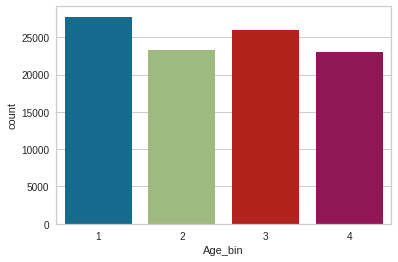

In [50]:
sns.countplot(x='Age_bin',data=train_processed)

<AxesSubplot:xlabel='Age_bin', ylabel='count'>

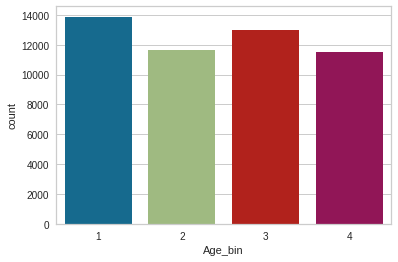

In [51]:
sns.countplot(x='Age_bin',data=test_processed)

<AxesSubplot:xlabel='Age_bin', ylabel='count'>

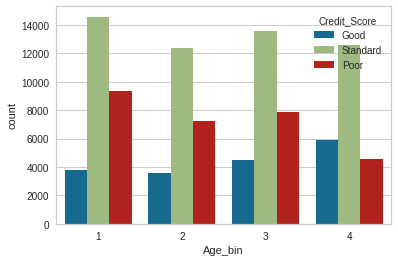

In [52]:
sns.countplot(x='Age_bin',data=train_processed,hue='Credit_Score')

In [22]:
labels ={'Good':0,'Poor':1,'Standard':2}

In [23]:
train_processed = train_processed[['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Age_bin',
       'Credit_Score']]

In [24]:
train_processed['Credit_Score'] = train_processed['Credit_Score'].map(labels)

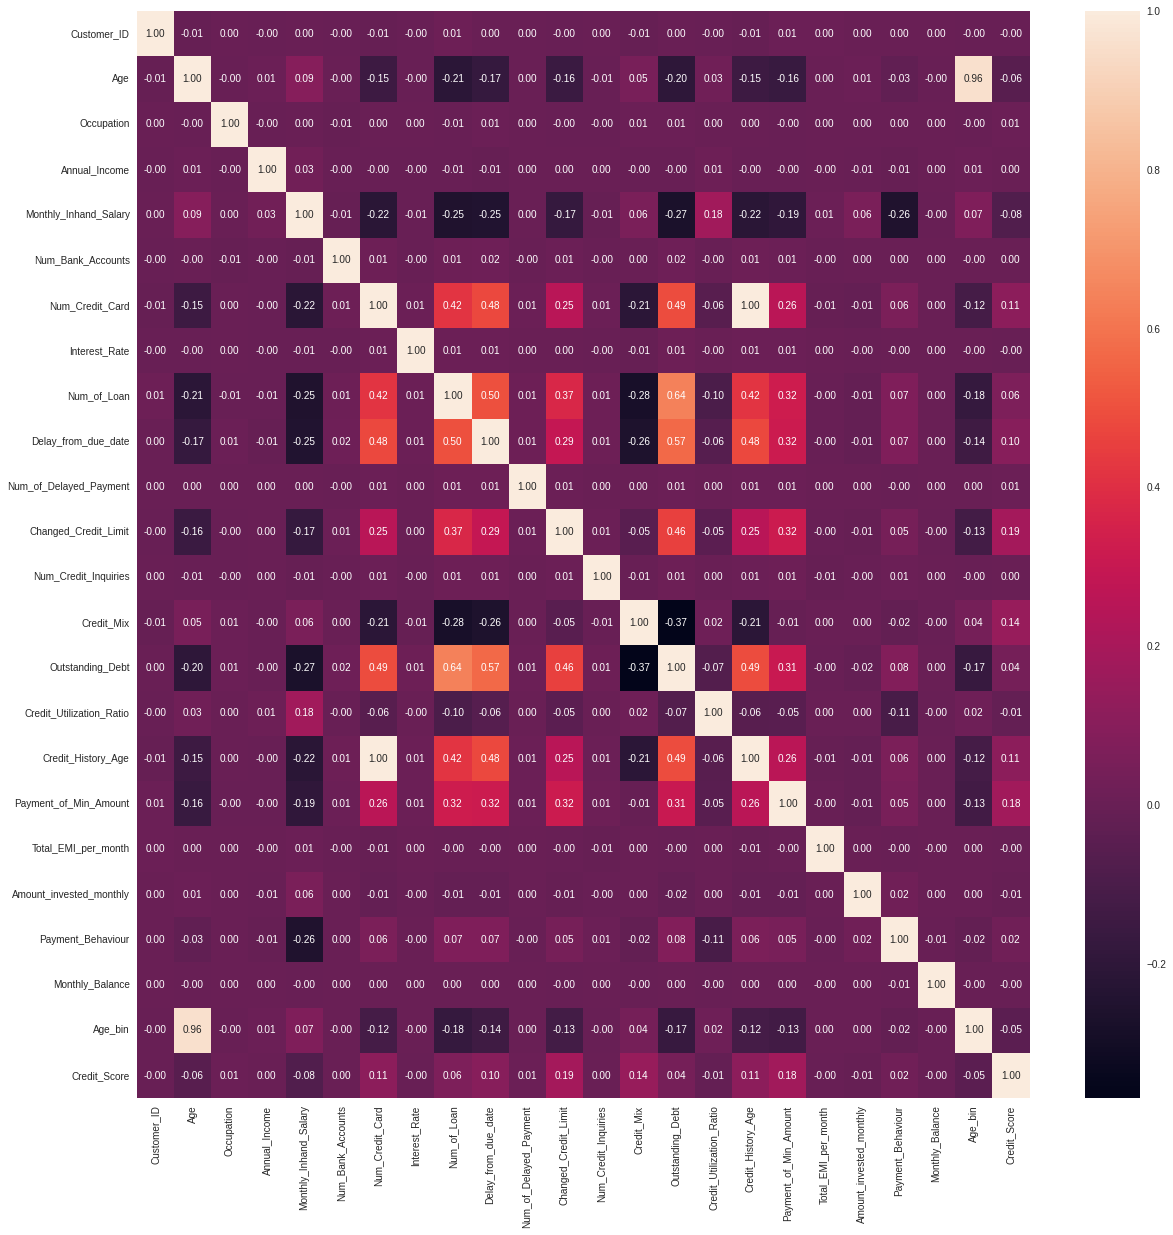

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(train_processed.corr(),annot=True,fmt=".2f")
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

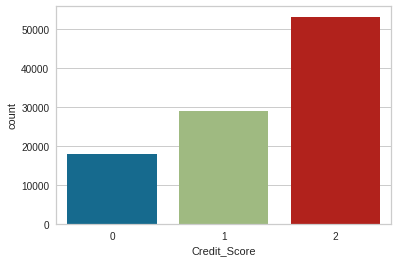

In [25]:
sns.countplot(x='Credit_Score',data=train_processed)

## Setting up data for pycaret

In [26]:
clf = setup(train_processed, target='Credit_Score', fix_imbalance=True,normalize = True,session_id=42)

,Description,Value
0,session_id,42
1,Target,Credit_Score
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(100000, 24)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


## Comapre Models

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7790,0.8866,0.7811,0.7835,0.7799,0.6396,0.6410,66.143
et,Extra Trees Classifier,0.7611,0.8704,0.7517,0.7623,0.7615,0.6049,0.6051,60.422
catboost,CatBoost Classifier,0.7555,0.8692,0.7506,0.7586,0.7564,0.5984,0.5989,159.525
xgboost,Extreme Gradient Boosting,0.7461,0.8653,0.7389,0.7491,0.7471,0.5820,0.5824,145.034
lightgbm,Light Gradient Boosting Machine,0.7262,0.8541,0.7270,0.7342,0.7282,0.5544,0.5560,44.264
gbc,Gradient Boosting Classifier,0.6922,0.8295,0.7092,0.7142,0.6962,0.5123,0.5184,163.251
dt,Decision Tree Classifier,0.6887,0.7376,0.6742,0.6904,0.6893,0.4861,0.4863,41.111
knn,K Neighbors Classifier,0.6663,0.8220,0.7190,0.7168,0.6673,0.4926,0.5127,204.030
ada,Ada Boost Classifier,0.6536,0.7496,0.6718,0.6786,0.6579,0.4544,0.4612,48.510
lda,Linear Discriminant Analysis,0.6421,0.7713,0.6714,0.6728,0.6461,0.4413,0.4504,40.098


In [ ]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


## Evaluate the Best Model

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Make Predictions on the Validation data

In [ ]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7829,0.889,0.7845,0.7868,0.7838,0.6461,0.6472


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_Behaviour_0,Payment_Behaviour_1,Payment_Behaviour_2,Payment_Behaviour_3,Payment_Behaviour_4,Payment_Behaviour_5,Payment_Behaviour_6,Credit_Score,Label,Score
0,-1.080215,-0.322772,-0.093106,-0.159653,-0.138190,-0.134615,-0.810345,-0.104383,0.049894,-0.142793,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Good,Good,0.55
1,0.466544,-1.345019,-0.113193,-0.920420,-0.079278,-0.117635,-0.203742,-0.054429,1.701548,-0.095739,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Poor,Poor,0.87
2,-1.435241,0.699475,-0.033115,2.103918,-0.104526,-0.132492,-1.214746,-0.131631,-0.968552,3.229431,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Good,Standard,0.55
3,-1.121233,0.141886,-0.109212,-0.808020,-0.096110,-0.087919,-0.405943,-0.072594,0.002661,-0.085282,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Poor,Poor,0.93
4,1.189898,-0.601566,-0.059357,1.037306,-0.138190,-0.130370,-1.349547,-0.131631,-0.094755,-0.121880,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Good,Good,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,-0.620428,1.071202,-0.104242,-0.611759,-0.104526,-0.138860,0.470260,-0.063511,1.207085,-0.121880,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,0.93
29997,-1.675804,-0.229840,-0.116053,-1.108108,-0.062446,-0.109144,-0.001542,-0.027180,1.353210,-0.111424,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Poor,Poor,0.82
29998,1.259462,-0.043977,-0.113012,-0.901552,-0.079278,-0.109144,-0.068942,-0.058970,-0.848996,-0.095739,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Poor,Poor,0.53
29999,-1.012868,-1.345019,-0.096387,-0.249858,-0.096110,-0.107022,2.761869,-0.049887,1.344354,-0.085282,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Poor,Poor,0.63


## Visualize the inference made by the best fit model

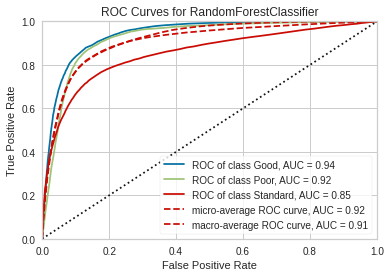

In [ ]:
plot_model(best_model, plot = 'auc')

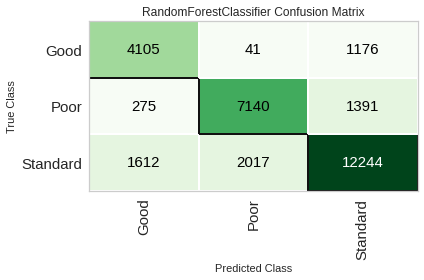

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')

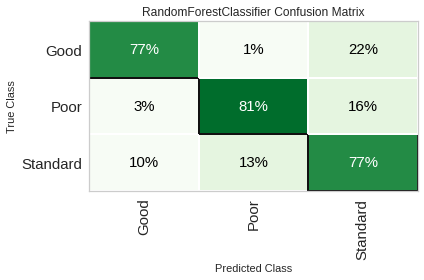

In [ ]:
plot_model(best_model , plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

## Tune best Model

In [ ]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6710,0.8282,0.7224,0.7295,0.6742,0.5010,0.5225
1,0.6743,0.8322,0.7220,0.7267,0.6777,0.5033,0.5223
2,0.6786,0.8310,0.7245,0.7291,0.6820,0.5090,0.5274
3,0.6660,0.8216,0.7132,0.7223,0.6703,0.4920,0.5116
4,0.6744,0.8292,0.7231,0.7301,0.6781,0.5049,0.5252
5,0.6686,0.8254,0.7137,0.7247,0.6736,0.4953,0.5145
6,0.6713,0.8286,0.7208,0.7276,0.6745,0.5007,0.5213
7,0.6700,0.8261,0.7116,0.7217,0.6749,0.4956,0.5132
8,0.6769,0.8294,0.7215,0.7270,0.6804,0.5059,0.5240


## Evaluate the tuned model

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Visualize the inference made by the best fit model

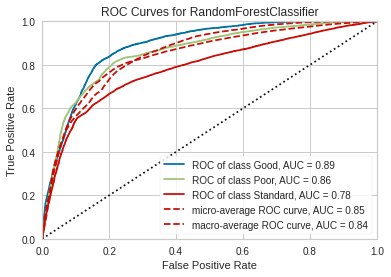

In [ ]:
plot_model(tuned_model, plot = 'auc')

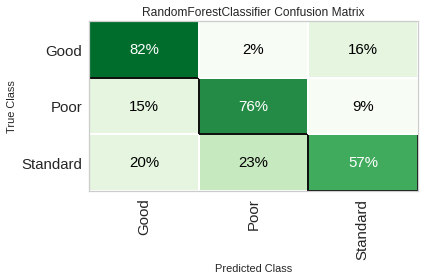

In [ ]:
plot_model(tuned_model , plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

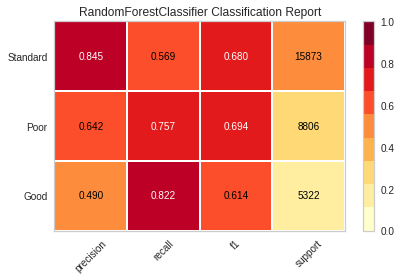

In [ ]:
plot_model(tuned_model , plot = 'class_report')

## Feature Importance

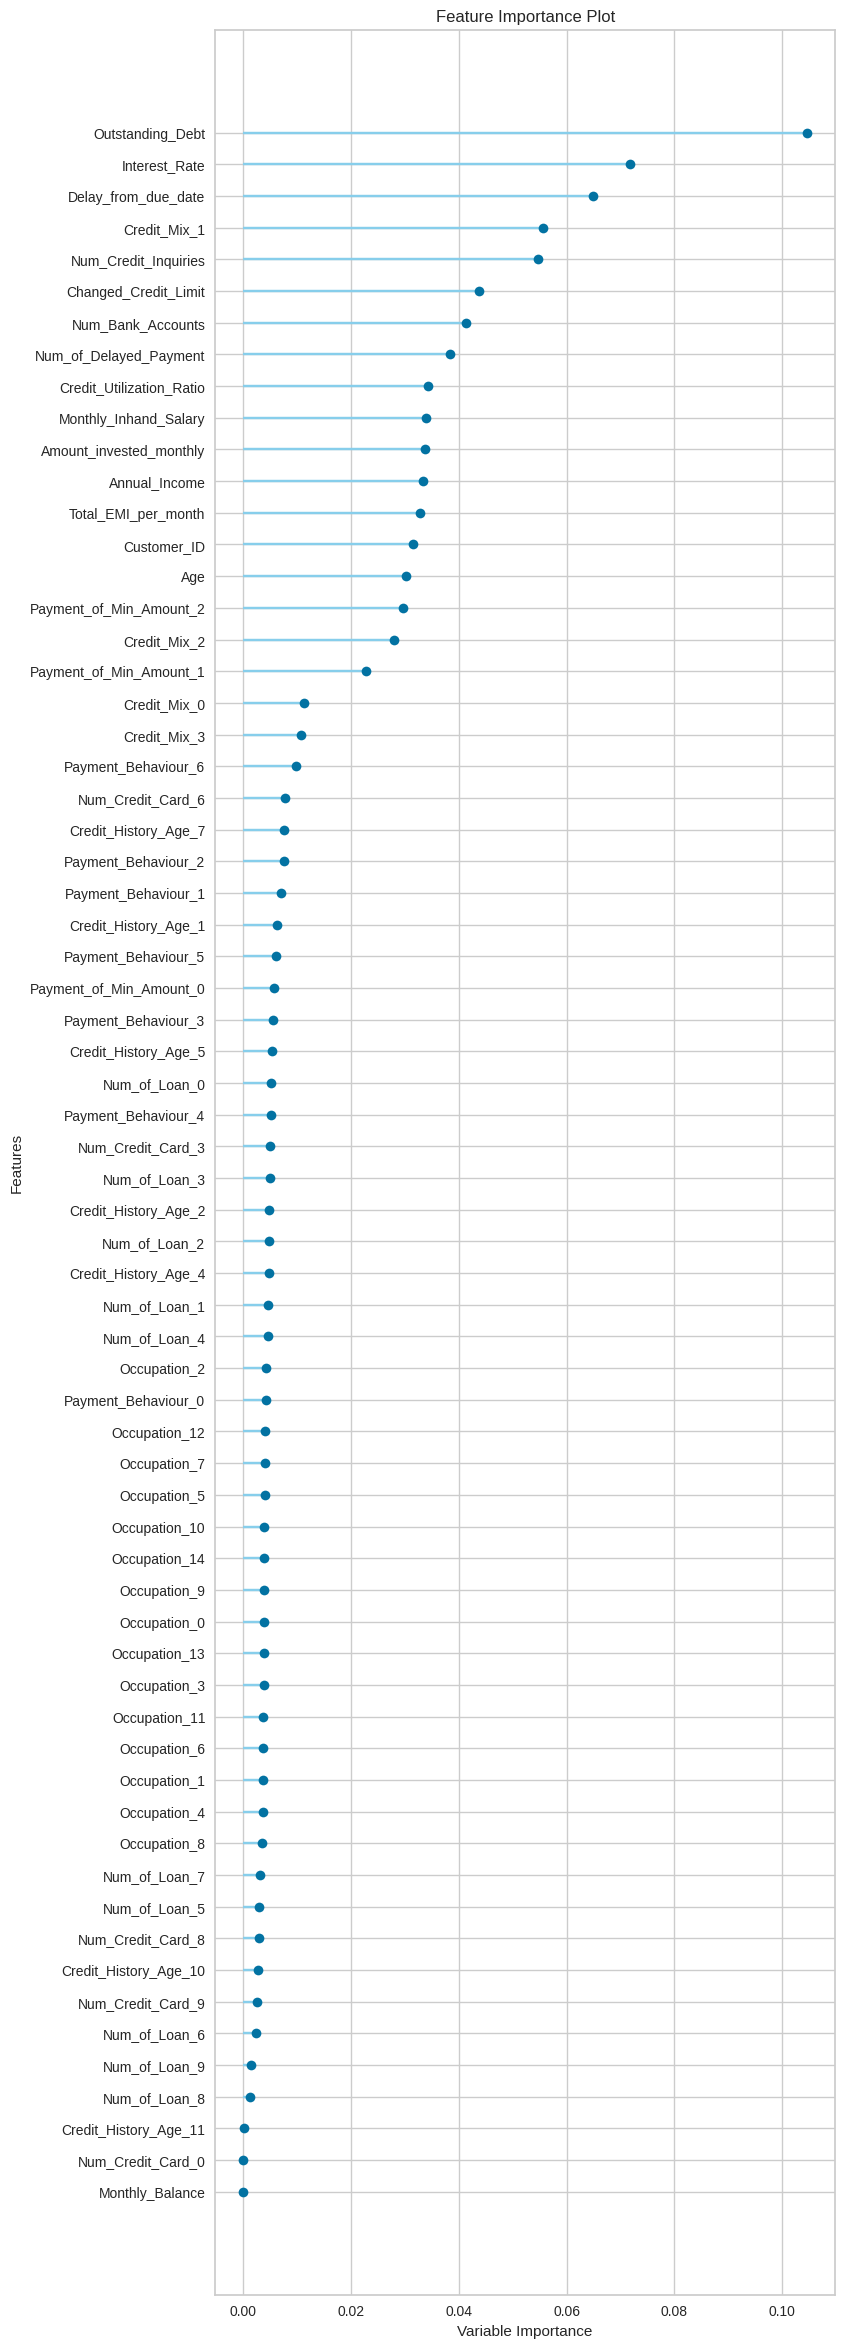

In [ ]:
plot_model(best_model, plot = 'feature_all', use_train_data = True)

## To generate labels on the unseen (new) dataset, simply pass the test dataset in the predict_model function

In [ ]:
predictions = predict_model(best_model, data=test_processed)
predictions.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Label,Score
0,12320,23,12,19114.12,1824.843333,3,4,3,4,3,...,809.979980,35.030402,4,1,49.574949,236.642682,6,186.266702,Good,0.79
1,12320,23,12,19114.12,1824.843333,3,4,3,4,3,...,809.979980,33.053114,4,1,49.574949,21.465380,2,361.444004,Good,0.56
2,12320,23,12,19114.12,1824.843333,3,4,3,4,-1,...,809.979980,33.811894,4,1,49.574949,148.233938,5,264.675446,Good,0.77
3,12320,23,12,19114.12,1824.843333,3,4,3,4,4,...,809.979980,32.430559,4,1,49.574949,39.082511,2,343.826873,Good,0.75
4,1066,28,13,34847.84,3037.986667,2,4,6,1,3,...,605.030029,25.926822,4,1,18.816215,39.684018,1,485.298434,Good,0.82


<AxesSubplot:xlabel='Label', ylabel='count'>

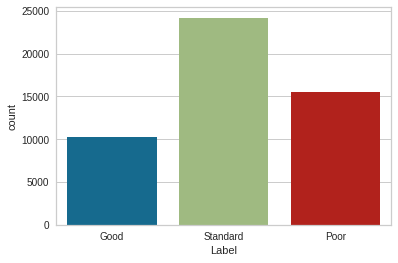

In [ ]:
sns.countplot(x='Label',data=predictions)

In [ ]:
test[['ID']].head()

,ID
0,0x160a
1,0x160b
2,0x160c
3,0x160d
4,0x1616


In [ ]:
test.shape

(50000, 27)

In [ ]:
pycaret = test[['ID']].copy()
pycaret['Credit_Score'] = predictions['Label']

In [ ]:
pycaret.shape

(50000, 2)

In [ ]:
pycaret.to_csv("Transunion_Hackerearth.csv",index=False)

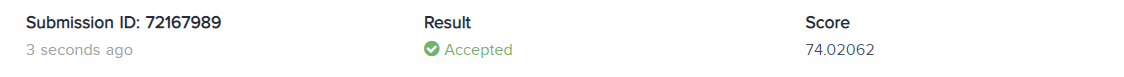

## Analyze Models with Plots

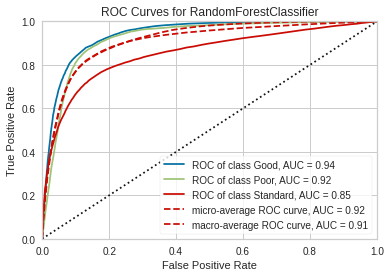

In [ ]:
plot_model(best_model)

##Stack Models

In [27]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7801,0.8880,0.7869,0.7862,0.7811,0.6433,0.6454
1,0.7844,0.8875,0.7857,0.7881,0.7852,0.6477,0.6489
2,0.7811,0.8872,0.7832,0.7859,0.7821,0.6433,0.6448
3,0.7783,0.8848,0.7771,0.7813,0.7790,0.6366,0.6374
4,0.7739,0.8872,0.7810,0.7805,0.7751,0.6333,0.6354
5,0.7787,0.8897,0.7813,0.7841,0.7799,0.6398,0.6414
6,0.7781,0.8876,0.7801,0.7826,0.7790,0.6383,0.6398
7,0.7797,0.8838,0.7778,0.7831,0.7806,0.6393,0.6402
8,0.7749,0.8859,0.7772,0.7793,0.7757,0.6330,0.6344


In [28]:
et = create_model('et',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7694,0.8756,0.7640,0.7705,0.7698,0.6191,0.6193
1,0.7676,0.8717,0.7573,0.7678,0.7677,0.6140,0.6140
2,0.7710,0.8741,0.7583,0.7715,0.7712,0.6206,0.6207
3,0.7620,0.8680,0.7500,0.7622,0.7621,0.6045,0.6045
4,0.7701,0.8742,0.7665,0.7714,0.7705,0.6209,0.6212
5,0.7630,0.8765,0.7550,0.7645,0.7635,0.6088,0.6090
6,0.7679,0.8731,0.7572,0.7686,0.7682,0.6156,0.6156
7,0.7597,0.8707,0.7440,0.7597,0.7597,0.5997,0.5997
8,0.7673,0.8742,0.7584,0.7678,0.7674,0.6145,0.6146


In [29]:
cat = create_model('catboost',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7579,0.8717,0.7569,0.7621,0.7590,0.6042,0.6052
1,0.7589,0.8710,0.7512,0.7610,0.7596,0.6025,0.6028
2,0.7614,0.8739,0.7578,0.7646,0.7624,0.6083,0.6089
3,0.7549,0.8664,0.7459,0.7566,0.7555,0.5950,0.5952
4,0.7597,0.8740,0.7569,0.7630,0.7607,0.6058,0.6065
5,0.7544,0.8699,0.7498,0.7589,0.7558,0.5977,0.5985
6,0.7576,0.8711,0.7515,0.7599,0.7583,0.6013,0.6017
7,0.7521,0.8666,0.7425,0.7549,0.7531,0.5915,0.5919
8,0.7530,0.8689,0.7478,0.7554,0.7538,0.5938,0.5942


In [31]:
# stacking models
stack = stack_models(estimator_list = [cat,et],meta_model = rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7797,0.8887,0.7558,0.7788,0.7782,0.6311,0.6318
1,0.7779,0.8866,0.7502,0.7772,0.7760,0.6264,0.6272
2,0.7786,0.8897,0.7524,0.7777,0.7767,0.6283,0.6292
3,0.7717,0.8844,0.7483,0.7711,0.7704,0.6173,0.6178
4,0.7780,0.8861,0.7617,0.7780,0.7773,0.6303,0.6308
5,0.7774,0.8889,0.7542,0.7763,0.7761,0.6276,0.6280
6,0.7747,0.8860,0.7511,0.7736,0.7733,0.6230,0.6235
7,0.7697,0.8816,0.7414,0.7685,0.7678,0.6126,0.6134
8,0.7759,0.8864,0.7547,0.7760,0.7746,0.6249,0.6257


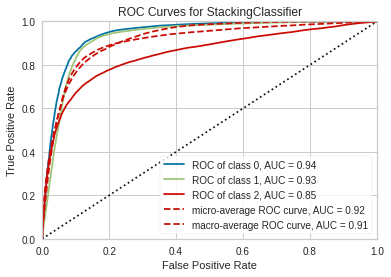

In [32]:
plot_model(stack, plot = 'auc')

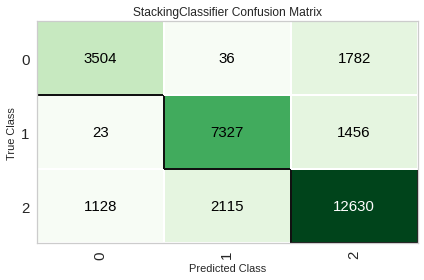

In [33]:
plot_model(stack, plot = 'confusion_matrix')

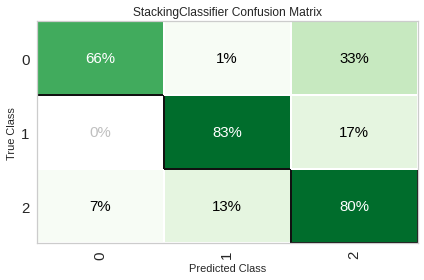

In [34]:
plot_model(stack, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [36]:
plot_model(stack, plot = 'parameter')

,Parameters
cv,5
estimators,"[('catboost', <catboost.core.CatBoostClassifie..."
final_estimator,"RandomForestClassifier(bootstrap=True, ccp_alp..."
n_jobs,-1
passthrough,True
stack_method,auto
verbose,0


## Predictions

In [38]:
predictions = predict_model(stack, data=test_processed)
predictions.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Age_bin,Label,Score
0,12320,23,12,19114.12,1824.843333,3,4,3,4,3,...,35.030402,4,1,49.574949,236.642682,6,186.266702,1,0,0.82
1,12320,23,12,19114.12,1824.843333,3,4,3,4,3,...,33.053114,4,1,49.574949,21.465380,2,361.444004,1,0,0.51
2,12320,23,12,19114.12,1824.843333,3,4,3,4,-1,...,33.811894,4,1,49.574949,148.233938,5,264.675446,1,0,0.85
3,12320,23,12,19114.12,1824.843333,3,4,3,4,4,...,32.430559,4,1,49.574949,39.082511,2,343.826873,1,0,0.64
4,1066,28,13,34847.84,3037.986667,2,4,6,1,3,...,25.926822,4,1,18.816215,39.684018,1,485.298434,2,0,0.95


<AxesSubplot:xlabel='Label', ylabel='count'>

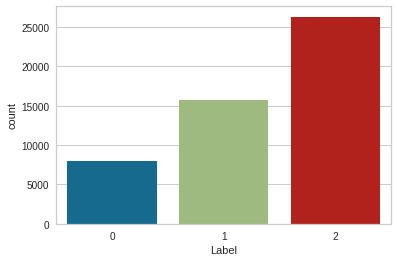

In [39]:
sns.countplot(x='Label',data=predictions)

In [40]:
labels_dec ={0: 'Good',1:'Poor',2:'Standard'}

In [41]:
predictions['Label'] = predictions['Label'].map(labels_dec)

<AxesSubplot:xlabel='Label', ylabel='count'>

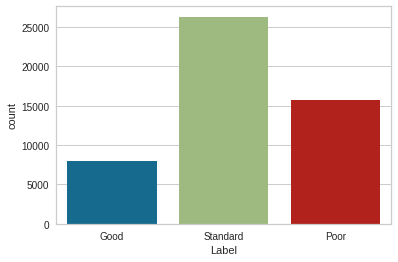

In [42]:
sns.countplot(x='Label',data=predictions)

In [45]:
pycaret = test[['ID']].copy()
pycaret['Credit_Score'] = predictions['Label']

In [46]:
pycaret.shape

(50000, 2)

In [47]:
pycaret.to_csv("Transunion_Hackerearth_stacking.csv",index=False)

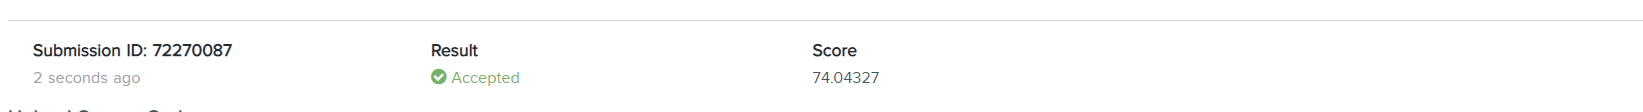